<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [ ]:
#After executing the below command restart the kernel and run all cells.
!pip3 install scikit-learn --upgrade --user

You will require the following libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Module 1: Importing Data Sets


Load the csv:


In [6]:
df=pd.read_excel('C:\\Users\\SIDDHARTH\\Desktop\\Today\\project.xlsx')

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




Display the data types of each column using the function dtypes


In [8]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [9]:
df.describe() #date column can be removed directly

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,10726.000000,1.072600e+04,1.072600e+04,10713.000000,10716.000000,10726.000000,1.072600e+04,10726.000000,10726.000000,10726.000000,...,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,9067.206321,4.534260e+09,5.317606e+05,3.353589,2.058091,2043.304960,1.517039e+04,1.430356,0.006806,0.233172,...,7.595282,1743.457580,299.847380,1967.430170,89.314842,98077.648611,47.560503,-122.214366,1970.142271,12959.380291
std,4760.290092,2.863545e+09,3.605499e+05,0.905990,0.753609,897.952111,3.790778e+04,0.511497,0.082220,0.761292,...,1.170345,806.780248,444.121882,27.891116,412.680776,53.809347,0.139735,0.137903,673.545263,26354.434042
min,0.000000,1.200019e+06,7.500000e+04,1.000000,0.500000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,460.000000,660.000000
25%,6051.250000,2.113701e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,...,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.465725,-122.325000,1480.000000,5400.000000
50%,8732.500000,3.903200e+09,4.499500e+05,3.000000,2.000000,1880.000000,7.834000e+03,1.000000,0.000000,0.000000,...,7.000000,1520.000000,0.000000,1969.000000,0.000000,98065.000000,47.574700,-122.229500,1840.000000,7800.000000
75%,11413.750000,7.233826e+09,6.380000e+05,4.000000,2.500000,2495.250000,1.094600e+04,2.000000,0.000000,0.000000,...,8.000000,2120.000000,600.000000,1990.000000,0.000000,98118.000000,47.679200,-122.125000,2330.000000,10201.500000
max,19454.000000,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,...,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.319000,6110.000000,871200.000000


# Module 2: Data Wrangling




Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. 


In [10]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.072600e+04,10713.000000,10716.000000,10726.000000,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,5.317606e+05,3.353589,2.058091,2043.304960,1.517039e+04,1.430356,0.006806,0.233172,3.453384,7.595282,1743.457580,299.847380,1967.430170,89.314842,98077.648611,47.560503,-122.214366,1970.142271,12959.380291
std,3.605499e+05,0.905990,0.753609,897.952111,3.790778e+04,0.511497,0.082220,0.761292,0.668310,1.170345,806.780248,444.121882,27.891116,412.680776,53.809347,0.139735,0.137903,673.545263,26354.434042
min,7.500000e+04,1.000000,0.500000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,460.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.465725,-122.325000,1480.000000,5400.000000
50%,4.499500e+05,3.000000,2.000000,1880.000000,7.834000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98065.000000,47.574700,-122.229500,1840.000000,7800.000000
75%,6.380000e+05,4.000000,2.500000,2495.250000,1.094600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,600.000000,1990.000000,0.000000,98118.000000,47.679200,-122.125000,2330.000000,10201.500000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.319000,6110.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [12]:
df.shape

(10726, 20)

We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [13]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [14]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [15]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [50]:
df.loc[df["price"]<=0].index

Int64Index([], dtype='int64')

In [16]:
df.corr()['price'].sort_values()

zipcode         -0.042837
long             0.019508
yr_built         0.035259
condition        0.046191
sqft_lot15       0.095143
sqft_lot         0.114042
yr_renovated     0.135524
waterfront       0.245885
floors           0.286252
lat              0.311305
bedrooms         0.311724
sqft_basement    0.319051
view             0.384987
bathrooms        0.528622
sqft_living15    0.597820
sqft_above       0.606955
grade            0.664251
sqft_living      0.703130
price            1.000000
Name: price, dtype: float64

In [17]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.311724,0.528622,0.703130,0.114042,0.286252,0.245885,0.384987,0.046191,0.664251,0.606955,0.319051,0.035259,0.135524,-0.042837,0.311305,0.019508,0.597820,0.095143
bedrooms,0.311724,1.000000,0.528969,0.579085,0.057510,0.208524,-0.006027,0.081443,0.043574,0.358108,0.464567,0.326909,0.164654,0.030916,-0.141547,0.003162,0.123617,0.380155,0.046791
bathrooms,0.528622,0.528969,1.000000,0.761770,0.130551,0.505155,0.064374,0.191813,-0.089238,0.655820,0.686502,0.293109,0.479297,0.070800,-0.208233,0.030685,0.240162,0.577620,0.111051
sqft_living,0.703130,0.579085,0.761770,1.000000,0.220729,0.397036,0.096208,0.277507,-0.040341,0.771181,0.869603,0.442161,0.325604,0.066699,-0.185686,0.060958,0.231624,0.757203,0.210560
sqft_lot,0.114042,0.057510,0.130551,0.220729,1.000000,0.033810,0.017006,0.069142,-0.023487,0.165825,0.231594,0.025574,0.111912,-0.010272,-0.131135,-0.074532,0.243125,0.186301,0.749693
floors,0.286252,0.208524,0.505155,0.397036,0.033810,1.000000,0.023465,0.053918,-0.220206,0.464960,0.571596,-0.235596,0.417716,0.039263,-0.081424,0.047421,0.167854,0.327709,0.026463
waterfront,0.245885,-0.006027,0.064374,0.096208,0.017006,0.023465,1.000000,0.382797,0.015107,0.081921,0.065243,0.076000,-0.026160,0.091353,0.023091,-0.017895,-0.035626,0.087068,0.038232
view,0.384987,0.081443,0.191813,0.277507,0.069142,0.053918,0.382797,1.000000,0.030254,0.256517,0.161258,0.268142,-0.034211,0.091751,0.092360,0.003567,-0.091401,0.287710,0.056924
condition,0.046191,0.043574,-0.089238,-0.040341,-0.023487,-0.220206,0.015107,0.030254,1.000000,-0.114663,-0.138191,0.169470,-0.314451,-0.075111,-0.002181,-0.034192,-0.113626,-0.089238,-0.022873
grade,0.664251,0.358108,0.655820,0.771181,0.165825,0.464960,0.081921,0.256517,-0.114663,1.000000,0.765870,0.167960,0.434426,0.023276,-0.189430,0.114085,0.217225,0.736324,0.156817


In [18]:
features =["floors","waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]

In [19]:
x=df[features]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [20]:
X_scaled[0]

array([-0.84140468, -0.08278001, -0.35285157, -0.39053413, -0.67517808,
       -0.30629857, -1.40475124, -0.93560401, -0.69843535, -0.50866202,
       -0.96146019])

In [21]:
y=df['price']

In [52]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
best_feature=SelectKBest(score_func=chi2,k=8)
fit=best_feature.fit(X,Y)

In [53]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [54]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['specs','score']

In [55]:
featurescores

,specs,score
0,floors,6.469213e+02
1,waterfront,4.963656e+03
2,lat,2.044221e+00
3,bedrooms,8.682783e+02
4,sqft_basement,2.457770e+06
5,view,1.116651e+04
6,bathrooms,1.413961e+03
7,sqft_living15,1.428686e+06
8,sqft_above,2.259856e+06
9,grade,1.236423e+03


# Module 3: Exploratory Data Analysis




Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [22]:
df['floors'].value_counts().to_frame()

,floors
1.0,5822
2.0,3633
1.5,1020
3.0,185
2.5,62
3.5,4




Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


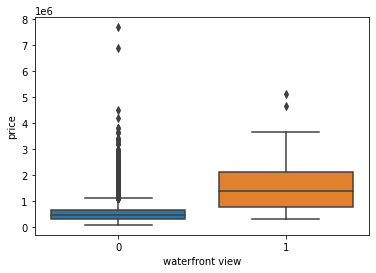

In [23]:
sns.boxplot(x='waterfront',y='price',data=df)
plt.xlabel('waterfront view')
plt.ylabel('price')
plt.show()


Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


(0.0, 8081250.0)

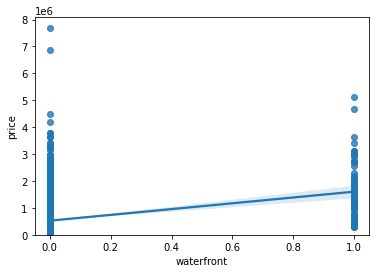

In [24]:
sns.regplot(x='waterfront',y='price',data=df)
plt.ylim(0,)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [25]:
df.corr()['price'].sort_values()

zipcode         -0.042837
long             0.019508
yr_built         0.035259
condition        0.046191
sqft_lot15       0.095143
sqft_lot         0.114042
yr_renovated     0.135524
waterfront       0.245885
floors           0.286252
lat              0.311305
bedrooms         0.311724
sqft_basement    0.319051
view             0.384987
bathrooms        0.528622
sqft_living15    0.597820
sqft_above       0.606955
grade            0.664251
sqft_living      0.703130
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [67]:
X = (df[['long',"floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","sqft_living"]])
Y= df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6446835579130661



Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. 


In [27]:
from sklearn.metrics import r2_score
lm=LinearRegression()
x=df[['sqft_living']]
y=df[['price']]
lm.fit(x,y)
y_pred=lm.predict(x)
r2=r2_score(y,y_pred)
print(r2)

0.494391881150825


Then calculate the R^2. Take a screenshot of your code.


In [28]:
y.value_counts()

price  
350000     103
450000      93
325000      83
400000      79
250000      77
          ... 
446450       1
446250       1
444950       1
444000       1
7700000      1
Length: 2554, dtype: int64

Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [29]:
lm=LinearRegression()
lm.fit(X_scaled,y)
lm.score(X_scaled,y)

0.6489042881450955



Creating a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [30]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [31]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [33]:
features =["floors","waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

X_train, X_test, y_train, y_test  = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)


print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 2146
number of training samples: 8580



Use and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [34]:
from sklearn.linear_model import Ridge

In [35]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train,y_train)
RigeModel.score(X_test,y_test)

0.6482481530101893



Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 


In [32]:
p=PolynomialFeatures(degree=2)
X_train_p=p.fit_transform(X_train)
X_test_p=p.fit_transform(X_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train,y_train)
RigeModel.score(X_test,y_test)

0.6482481530101893

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [70]:
classifier= RandomForestRegressor(n_estimators=100)

In [71]:
classifier.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=classifier.predict(X_test)

In [77]:
r2_score(y_test,y_pred)

0.8268807684605783

# Thank You